### PyTorch DataLoader Exercises

Welcome to the PyTorchDataLoader exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.



In [ ]:
# Import necessary libraries
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO
import numpy as np

In [ ]:
# Define the path to the dataset
dataset_path = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'  # Replace with the path to your dataset

# Send a GET request to the URL
response = requests.get(dataset_path)
# Check if the request was successful
if response.status_code == 200:
    # Open the downloaded bytes and extract them
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/dataset')
    print('Download and extraction complete!')

Download and extraction complete!


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms. Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the dataset
tiny_imagenet_dataset_train = ImageFolder(root='/dataset/tiny-imagenet-200/train', transform=data_transforms['train'])
tiny_imagenet_dataset_test = ImageFolder(root='/dataset/tiny-imagenet-200/test', transform=data_transforms['val'])

Number of classes: 200
Number of samples: 100000
Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


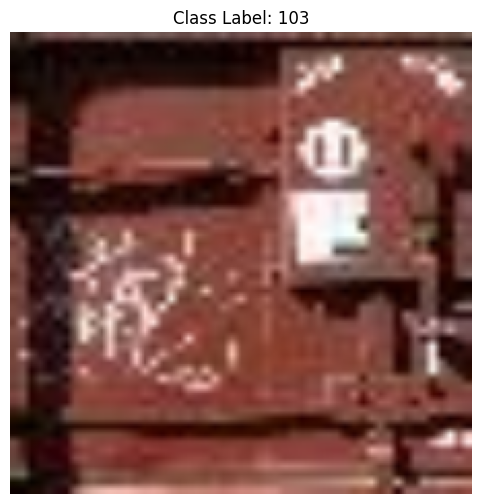

Label: 103
Class name: n03393912


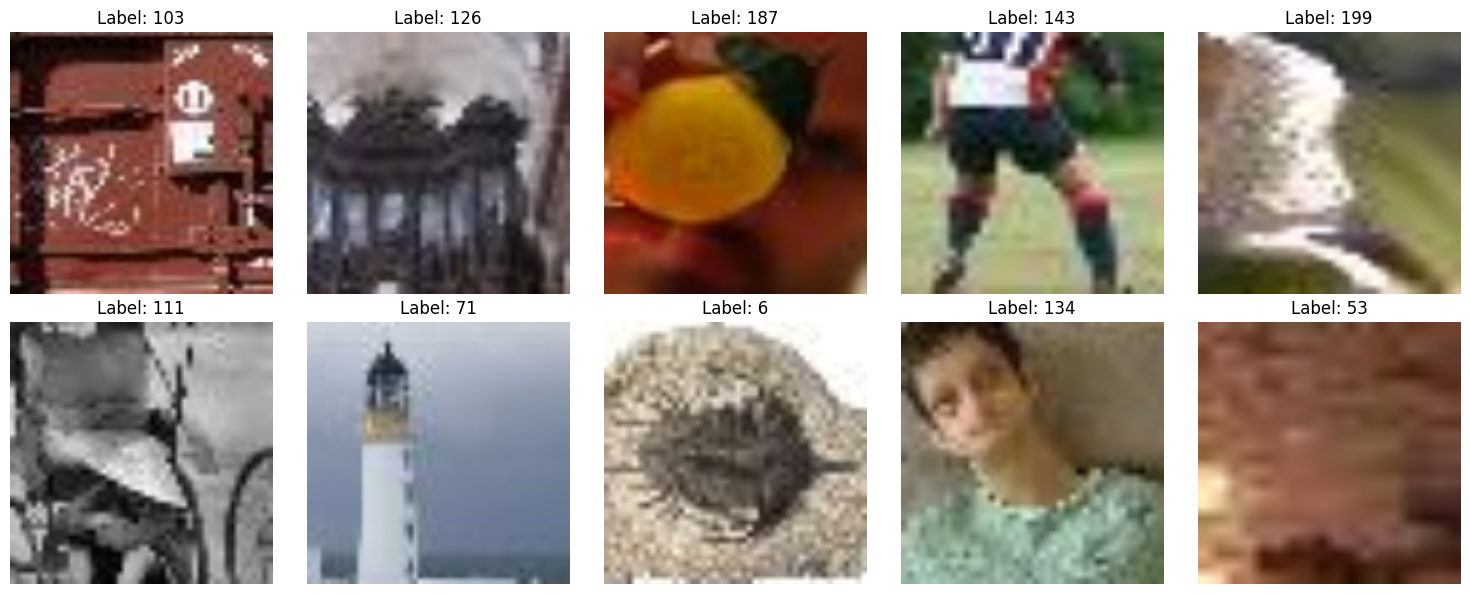

In [ ]:

# Create a DataLoader
dataloader_train = DataLoader(tiny_imagenet_dataset_train, batch_size=64, shuffle=True)
dataloader_test = DataLoader(tiny_imagenet_dataset_test, batch_size=64, shuffle=True)

# Determine the number of classes and samples
num_classes = len(tiny_imagenet_dataset_train.classes)
num_samples = len(tiny_imagenet_dataset_train)

print(f'Number of classes: {num_classes}')
print(f'Number of samples: {num_samples}')

# Function to denormalize image for visualization
def denormalize(tensor):
    """Denormalize a tensor image with mean and std."""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor

# Get one batch of training data
train_features, train_labels = next(iter(dataloader_train))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Visualize the first image in the batch
img_tensor = train_features[0]  # Shape: (3, 224, 224)
label = train_labels[0].item()

# Denormalize the image
img_tensor = denormalize(img_tensor)

# Convert to numpy and transpose to (H, W, C) for matplotlib
img_numpy = img_tensor.permute(1, 2, 0).numpy()

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img_numpy)
plt.title(f"Class Label: {label}")
plt.axis('off')
plt.show()

print(f"Label: {label}")
print(f"Class name: {tiny_imagenet_dataset_train.classes[label]}")

# Visualize multiple samples (first 10 images from the batch)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(min(10, len(train_features))):
    img_tensor = train_features[i]
    label = train_labels[i].item()

    # Denormalize and convert to numpy
    img_tensor = denormalize(img_tensor)
    img_numpy = img_tensor.permute(1, 2, 0).numpy()

    # Display on subplot
    axes[i].imshow(img_numpy)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
